# P5 : Catégorisez automatiquement des questions - Nettoyage et exploration des données

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup
from collections import Counter as count
import matplotlib.pylab as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...


## Importation et format des données 

In [2]:
data = pd.read_csv('QueryResults.csv')

In [3]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,React-Native: Download Image from Firebase Sto...,<p><strong>Pre-Informations:</strong></p>\n\n<...,<javascript><image><firebase><react-native><fi...,39385219,5,12803,1,3
1,How to set Entity Framework Core migration tim...,<p>I'm using the latest (1.0.0) version of EF ...,<c#><entity-framework><entity-framework-core>,39006847,39,36435,3,6
2,gtk.StatusIcon and gtk.Menu on Windows,<p>I have a crossplatform app that has a gtk.S...,<gtk><pygtk>,1138891,4,1390,1,3
3,How to create shared package.json for multiple...,<p>I am building my app using separated micro ...,<node.js><npm>,39385269,14,12103,2,3
4,How to add draggable scrollbar to scrollview/l...,<p>I have a listView that uses a customListAda...,<android><android-listview><scrollbar>,18254370,9,6877,1,1


In [4]:
data.shape

(50000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          50000 non-null  object
 1   Body           50000 non-null  object
 2   Tags           50000 non-null  object
 3   Id             50000 non-null  int64 
 4   Score          50000 non-null  int64 
 5   ViewCount      50000 non-null  int64 
 6   FavoriteCount  50000 non-null  int64 
 7   AnswerCount    50000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ MB


In [6]:
data.isna().mean()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [7]:
data['Title'] = data['Title'].astype(str)

In [8]:
data['Body'] = data['Body'].astype(str)

In [9]:
data['Tags'] = data['Tags'].astype(str)

In [10]:
data['Title'][:10]

0    React-Native: Download Image from Firebase Sto...
1    How to set Entity Framework Core migration tim...
2               gtk.StatusIcon and gtk.Menu on Windows
3    How to create shared package.json for multiple...
4    How to add draggable scrollbar to scrollview/l...
5     How to set order of cipher suites for Jetty SSL?
6    The TCP/IP connection to the host localhost, p...
7    Workaround for lack of line width on Windows w...
8    View doesn't start from bottom of status bar i...
9      show process's full command line in powershell?
Name: Title, dtype: object

In [11]:
data['Body'][:10]

0    <p><strong>Pre-Informations:</strong></p>\n\n<...
1    <p>I'm using the latest (1.0.0) version of EF ...
2    <p>I have a crossplatform app that has a gtk.S...
3    <p>I am building my app using separated micro ...
4    <p>I have a listView that uses a customListAda...
5    <p>For serving my application I use Apache or ...
6    <p>I'm getting this 2 errors repeatedly when I...
7    <p>I'm trying to draw a rotating 3D coordinate...
8    <p>When updating my app for iOS7, the UI is ap...
9    <p>When I run this command</p>\n\n<p><code>PS ...
Name: Body, dtype: object

In [12]:
data['Tags'][:10]

0    <javascript><image><firebase><react-native><fi...
1        <c#><entity-framework><entity-framework-core>
2                                         <gtk><pygtk>
3                                       <node.js><npm>
4               <android><android-listview><scrollbar>
5                                   <java><ssl><jetty>
6                    <java><sql-server><eclipse><jdbc>
7                        <javascript><three.js><webgl>
8                     <iphone><ios><objective-c><ios7>
9                                         <powershell>
Name: Tags, dtype: object

## Nettoyage des données

### Etapes communes

#### Suppression des duplicats

In [14]:
print(data.shape)
data.drop_duplicates(subset=['Title'], inplace =True)
data.drop_duplicates(subset=['Body'], inplace =True)
print(data.shape)

(50000, 8)
(49997, 8)


In [29]:
data_c = data.copy()

In [30]:
data_c.shape

(49997, 8)

#### Suppression des balises html

In [31]:
def sup_balise(sentence) :
    return BeautifulSoup(sentence).get_text()

In [32]:
data_c["Title"] = data_c["Title"].apply(sup_balise)
data_c["Title"].head()

0    React-Native: Download Image from Firebase Sto...
1    How to set Entity Framework Core migration tim...
2               gtk.StatusIcon and gtk.Menu on Windows
3    How to create shared package.json for multiple...
4    How to add draggable scrollbar to scrollview/l...
Name: Title, dtype: object

In [33]:
data_c["Body"] = data_c["Body"].apply(sup_balise)
data_c["Body"].head()

0    Pre-Informations:\nI still have a Firebase pro...
1    I'm using the latest (1.0.0) version of EF Cor...
2    I have a crossplatform app that has a gtk.Stat...
3    I am building my app using separated micro ser...
4    I have a listView that uses a customListAdapte...
Name: Body, dtype: object

#### Nettoyage des tags

In [37]:
data_c['Tags'] = data_c.apply(lambda r :r['Tags'].replace('<', ' ').replace('>', ' ') , axis=1)

In [38]:
data_c['Tags'].head()

0     javascript  image  firebase  react-native  fi...
1         c#  entity-framework  entity-framework-core 
2                                          gtk  pygtk 
3                                        node.js  npm 
4                android  android-listview  scrollbar 
Name: Tags, dtype: object

In [227]:
data_c.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,React-Native: Download Image from Firebase Sto...,Pre-Informations:\nI still have a Firebase pro...,javascript image firebase react-native fi...,39385219,5,12803,1,3
1,How to set Entity Framework Core migration tim...,I'm using the latest (1.0.0) version of EF Cor...,c# entity-framework entity-framework-core,39006847,39,36435,3,6
2,gtk.StatusIcon and gtk.Menu on Windows,I have a crossplatform app that has a gtk.Stat...,gtk pygtk,1138891,4,1390,1,3
3,How to create shared package.json for multiple...,I am building my app using separated micro ser...,node.js npm,39385269,14,12103,2,3
4,How to add draggable scrollbar to scrollview/l...,I have a listView that uses a customListAdapte...,android android-listview scrollbar,18254370,9,6877,1,1


### Etapes spécifiques au Bag of Words

In [153]:
data_c2 = data_c.copy()
print(data_c2.shape)

(49997, 8)


#### Suppression des majuscules

In [154]:
def sup_maj(sentence) :
    return sentence.lower()

In [155]:
data_c2["Title"] = data_c2["Title"].apply(sup_maj)
data_c2["Title"].head()

0    react-native: download image from firebase sto...
1    how to set entity framework core migration tim...
2               gtk.statusicon and gtk.menu on windows
3    how to create shared package.json for multiple...
4    how to add draggable scrollbar to scrollview/l...
Name: Title, dtype: object

In [156]:
data_c2["Body"] = data_c2["Body"].apply(sup_maj)
data_c2["Body"].head()

0    pre-informations:\ni still have a firebase pro...
1    i'm using the latest (1.0.0) version of ef cor...
2    i have a crossplatform app that has a gtk.stat...
3    i am building my app using separated micro ser...
4    i have a listview that uses a customlistadapte...
Name: Body, dtype: object

#### Exploration des tags

In [157]:
data_c2['Tags_split'] = data_c2.apply(lambda r :r['Tags'].split(), axis=1)

In [158]:
data_c2['Tags_split'].head()

0    [javascript, image, firebase, react-native, fi...
1        [c#, entity-framework, entity-framework-core]
2                                         [gtk, pygtk]
3                                       [node.js, npm]
4               [android, android-listview, scrollbar]
Name: Tags_split, dtype: object

In [62]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [72]:
dico_tags = liste_tags(data_c2['Tags_split'])

In [73]:
dico_tags

{'javascript': 3355,
 'image': 257,
 'firebase': 195,
 'react-native': 138,
 'firebase-storage': 8,
 'c#': 5392,
 'entity-framework': 181,
 'entity-framework-core': 24,
 'gtk': 19,
 'pygtk': 11,
 'node.js': 494,
 'npm': 84,
 'android': 1775,
 'android-listview': 19,
 'scrollbar': 12,
 'java': 4268,
 'ssl': 119,
 'jetty': 13,
 'sql-server': 944,
 'eclipse': 436,
 'jdbc': 90,
 'three.js': 19,
 'webgl': 11,
 'iphone': 1025,
 'ios': 1129,
 'objective-c': 880,
 'ios7': 251,
 'powershell': 202,
 'html': 1542,
 'css': 1129,
 'position': 16,
 'windows': 802,
 'git': 577,
 'github': 99,
 'version-control': 236,
 'gitkraken': 2,
 'jenkins': 90,
 'haskell': 172,
 'syntax': 122,
 'syntactic-sugar': 5,
 'guard': 2,
 'jquery': 1470,
 'google-chrome': 161,
 'mobile': 51,
 'sql': 1283,
 'tsql': 276,
 'sql-server-2008': 130,
 'lisp': 61,
 'let': 5,
 'do-loops': 1,
 'python': 3673,
 'tkinter': 21,
 'matplotlib': 114,
 'svn': 343,
 'apache2': 17,
 'webdav': 7,
 'java-8': 72,
 'logback': 14,
 'completable

In [96]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [97]:
tags_df.head()

,Tags,Quantity
0,javascript,3355
1,image,257
2,firebase,195
3,react-native,138
4,firebase-storage,8


In [98]:
tags_df.describe()

,Quantity
count,13149.000000
mean,11.595102
std,96.747311
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5392.000000


In [138]:
freqt_tags = pd.DataFrame(tags_df[tags_df['Quantity']>200])

In [139]:
freqt_tags.shape

(93, 2)

In [149]:
list(freqt_tags['Tags'])

['javascript',
 'image',
 'c#',
 'node.js',
 'android',
 'java',
 'sql-server',
 'eclipse',
 'iphone',
 'ios',
 'objective-c',
 'ios7',
 'powershell',
 'html',
 'css',
 'windows',
 'git',
 'version-control',
 'jquery',
 'sql',
 'tsql',
 'python',
 'svn',
 '.net',
 'wpf',
 'linux',
 'bash',
 'asp.net',
 'oracle',
 'json',
 'c++',
 'asp.net-mvc',
 'multithreading',
 'pandas',
 'typescript',
 'php',
 'design-patterns',
 'angularjs',
 'rest',
 'c',
 'macos',
 'sql-server-2005',
 'unit-testing',
 'language-agnostic',
 'math',
 'oop',
 'scala',
 'algorithm',
 'string',
 'wcf',
 'performance',
 'linq',
 'cocoa',
 'cocoa-touch',
 'xcode',
 'r',
 'database',
 'generics',
 'mysql',
 'xml',
 'http',
 'spring',
 'ruby',
 'winapi',
 'visual-studio-2008',
 'perl',
 'file',
 'swift',
 'python-3.x',
 'vb.net',
 'arrays',
 'datetime',
 'hibernate',
 'exception',
 'ruby-on-rails',
 'user-interface',
 'ajax',
 'angular',
 'delphi',
 'visual-studio',
 'regex',
 'optimization',
 'debugging',
 'vim',
 'secu

[Text(0.5, 1.0, 'Répartition des effectifs pour les Tags les plus fréquents'),
 Text(0.5, 0, 'Tags les plus fréquents')]

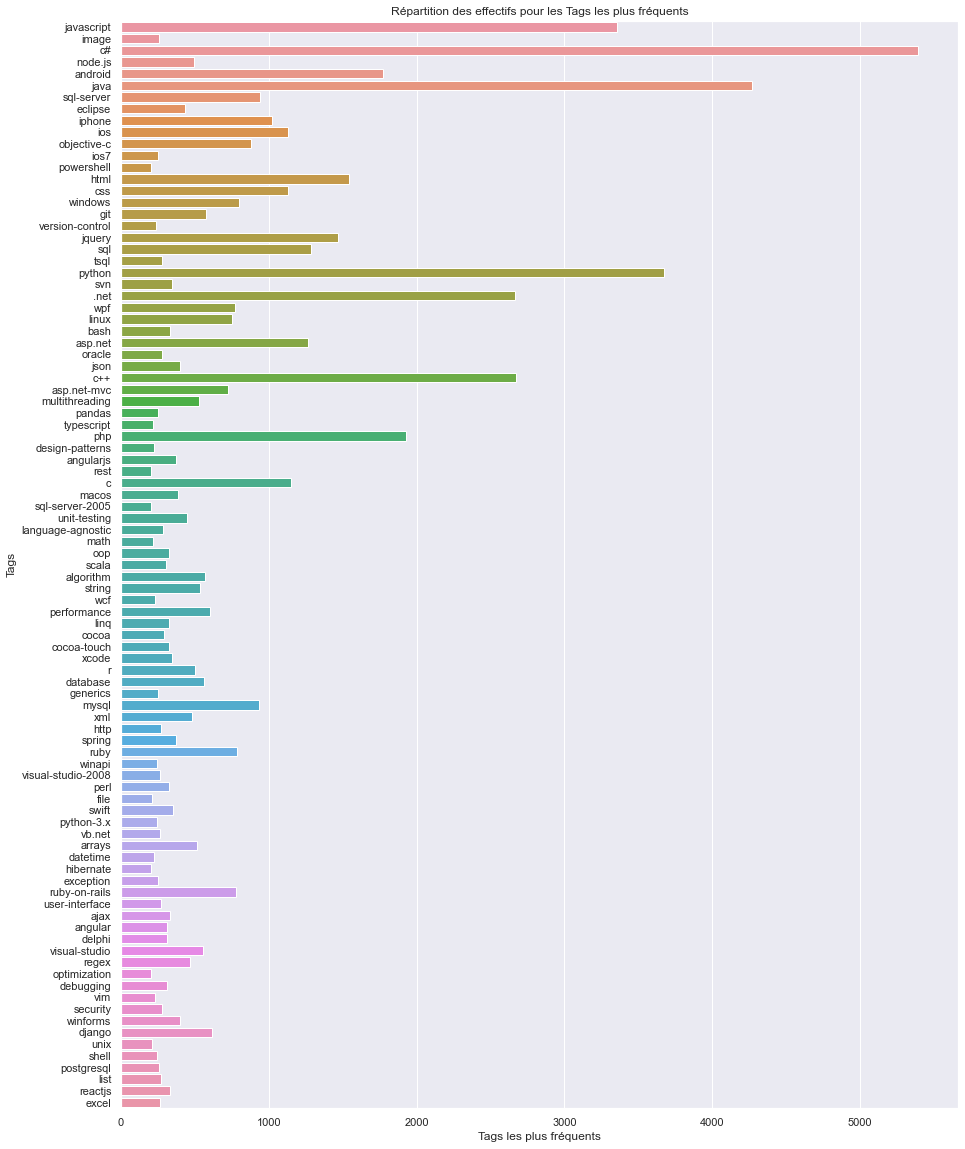

In [148]:
sns.set(rc = {'figure.figsize':(15,20)})
fig = sns.barplot(y=freqt_tags['Tags'], x=freqt_tags['Quantity'], orient='h')
fig.set(title ="Répartition des effectifs pour les Tags les plus fréquents", xlabel="Tags les plus fréquents")

In [120]:
tags_liste = list(dico_tags.keys())

In [121]:
tags_liste

['javascript',
 'image',
 'firebase',
 'react-native',
 'firebase-storage',
 'c#',
 'entity-framework',
 'entity-framework-core',
 'gtk',
 'pygtk',
 'node.js',
 'npm',
 'android',
 'android-listview',
 'scrollbar',
 'java',
 'ssl',
 'jetty',
 'sql-server',
 'eclipse',
 'jdbc',
 'three.js',
 'webgl',
 'iphone',
 'ios',
 'objective-c',
 'ios7',
 'powershell',
 'html',
 'css',
 'position',
 'windows',
 'git',
 'github',
 'version-control',
 'gitkraken',
 'jenkins',
 'haskell',
 'syntax',
 'syntactic-sugar',
 'guard',
 'jquery',
 'google-chrome',
 'mobile',
 'sql',
 'tsql',
 'sql-server-2008',
 'lisp',
 'let',
 'do-loops',
 'python',
 'tkinter',
 'matplotlib',
 'svn',
 'apache2',
 'webdav',
 'java-8',
 'logback',
 'completable-future',
 '.net',
 'input',
 'android-edittext',
 'wpf',
 'keyboard',
 'caliburn.micro',
 'linux',
 'bash',
 'asp.net',
 'google-visualization',
 'oracle',
 'stored-procedures',
 'plsql',
 'warnings',
 'json',
 '.net-4.0',
 'json.net',
 'zsh',
 'nitrousio',
 'c++',
 

In [123]:
len(tags_liste)

13149

#### Tokénisation

In [163]:
#Fonction de tokénisation qui créé des tokens en conservant les ponctuations de stags fréquents
def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('<', ' ').replace('>', ' ').replace('/', ' ').replace('_', ' ').replace(
        '""', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('*', ' ').replace(
        '%', ' ').replace('$', ' ').replace('=', ' ').replace('€', ' ').replace('?', ' ').replace('!', ' ').replace(
        ';', ' ').replace('{', ' ').replace('}', ' ').replace('~', ' ').replace('1', ' ').replace('4', ' ').replace(
        '6', ' ').replace('9', ' ').replace(':', ' ')
    tokens = word_tokenize(sentence_clean)
    return tokens

In [164]:
data_c2["Title_t"] = data_c2["Title"].apply(tokenizer_fct)
data_c2["Title_t"].head()

0    [react-native, download, image, from, firebase...
1    [how, to, set, entity, framework, core, migrat...
2         [gtk.statusicon, and, gtk.menu, on, windows]
3    [how, to, create, shared, package.json, for, m...
4    [how, to, add, draggable, scrollbar, to, scrol...
Name: Title_t, dtype: object

In [165]:
data_c2["Body_t"] = data_c2["Body"].apply(tokenizer_fct)
data_c2["Body_t"].head()

0    [pre-informations, i, still, have, a, firebase...
1    [i, 'm, using, the, latest, .0.0, version, of,...
2    [i, have, a, crossplatform, app, that, has, a,...
3    [i, am, building, my, app, using, separated, m...
4    [i, have, a, listview, that, uses, a, customli...
Name: Body_t, dtype: object

#### Normalisation

##### Suppression des mots vides

In [170]:
stop_w = list(set(stopwords.words('english')))

In [174]:
stop_w_tags = []
for w in stop_w :
    if w in tags_liste :
        stop_w_tags.append(w)
print(stop_w_tags)
print(len(stop_w_tags))

['was', 'having', 'each', 'this', 'm', 'd', 'where', 'against', 'any', 'between']
10


In [192]:
tags_df[tags_df['Tags'] == 'm']

,Tags,Quantity
4881,m,3


In [189]:
print(len(stop_w))
stop_w = [w for w in stop_w if stop_w_tags.count(w)==0]
print(len(stop_w))

179
169


In [193]:
def stop_word_filter(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    return filtered_w

In [203]:
data_c2["Title_fw"] = data_c2["Title_t"].apply(stop_word_filter)
data_c2["Title_fw"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                  [gtk.statusicon, gtk.menu, windows]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw, dtype: object

In [204]:
data_c2["Body_fw"] = data_c2["Body_t"].apply(stop_word_filter)
data_c2["Body_fw"].head()

0    [pre-informations, still, firebase, project, o...
1    ['m, using, latest, .0.0, version, ef, core, ....
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, uses, customlistadapter, created, ....
Name: Body_fw, dtype: object

##### Suppression des mots courts

In [198]:
tags_liste_2 = [w for w in tags_liste if len(w) <= 2]
print(tags_liste_2)
print(len(tags_liste_2))

['c#', 'c', 'go', 'r', 'n2', 'gd', 'f#', 'vi', 'ip', 'io', 'qt', 'na', '2d', '3d', 'z3', 'el', 'dt', 'sp', 'ld', 'k2', 's4', 'tk', 'cp', 'h2', 'ln', 'zk', 'v8', 'sf', 't4', 'q', 'p2', 'm', 'il', 'jq', 'dd', 'e4', 'nm', 'sh', 'tr', 'd', 'ca', 'gm', 'ls', 'tm', 'mq', 'rm', 'np', 'c5', 'mv', 'du', 'fs', 'xs', 'lm', 'oz', 'yo', 'cd', 'ps', 'cg', 'mt', 'ri', 'nt', 'pi', 'ml']
63


In [208]:
def short_word_filter(list_words) :
    for w in list_words :
        if len(w) <= 2 :
            if w not in tags_liste :
                list_words.remove(w)
    return list_words

In [209]:
data_c2["Title_fw2"] = data_c2["Title_fw"].apply(short_word_filter)
data_c2["Title_fw2"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                  [gtk.statusicon, gtk.menu, windows]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw2, dtype: object

In [210]:
data_c2["Body_fw2"] = data_c2["Body_fw"].apply(short_word_filter)
data_c2["Body_fw2"].head()

0    [pre-informations, still, firebase, project, o...
1    [using, latest, .0.0, version, core, migration...
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, uses, customlistadapter, created, u...
Name: Body_fw2, dtype: object

##### Lemmatization

In [213]:
lemmatizer = WordNetLemmatizer()

def lemma_fct(list_words) :
    lemma_w = []
    for w in list_words :
        lemma_w.append(lemmatizer.lemmatize(w))
    return lemma_w

In [220]:
data_c2["Title_fw3"] = data_c2["Title_fw2"].apply(lemma_fct)
data_c2["Title_fw3"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                   [gtk.statusicon, gtk.menu, window]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw3, dtype: object

In [221]:
data_c2["Body_fw3"] = data_c2["Body_fw2"].apply(lemma_fct)
data_c2["Body_fw3"].head()

0    [pre-informations, still, firebase, project, o...
1    [using, latest, .0.0, version, core, migration...
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, us, customlistadapter, created, use...
Name: Body_fw3, dtype: object

#### Reconstitution des phrases

In [222]:
def join_fct(sentence) :
    return ' '.join(sentence)

In [223]:
data_c2["Title_j"] = data_c2["Title_fw3"].apply(join_fct)
data_c2["Title_j"].head()

0         react-native download image firebase storage
1          set entity framework core migration timeout
2                       gtk.statusicon gtk.menu window
3    create shared package.json multiple npm reposi...
4    add draggable scrollbar scrollview listview an...
Name: Title_j, dtype: object

In [224]:
data_c2["Body_j"] = data_c2["Body_fw3"].apply(join_fct)
data_c2["Body_j"].head()

0    pre-informations still firebase project opened...
1    using latest .0.0 version core migration run q...
2    crossplatform app gtk.statusicon sitting tray ...
3    building app using separated micro service eac...
4    listview us customlistadapter created user scr...
Name: Body_j, dtype: object

In [226]:
data_c2.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,Tags_split,Title_t,Body_t,Title_fw,Body_fw,Title_fw2,Body_fw2,Title_fw3,Body_fw3,Title_j,Body_j
0,react-native: download image from firebase sto...,pre-informations:\ni still have a firebase pro...,javascript image firebase react-native fi...,39385219,5,12803,1,3,"[javascript, image, firebase, react-native, fi...","[react-native, download, image, from, firebase...","[pre-informations, i, still, have, a, firebase...","[react-native, download, image, firebase, stor...","[pre-informations, still, firebase, project, o...","[react-native, download, image, firebase, stor...","[pre-informations, still, firebase, project, o...","[react-native, download, image, firebase, stor...","[pre-informations, still, firebase, project, o...",react-native download image firebase storage,pre-informations still firebase project opened...
1,how to set entity framework core migration tim...,i'm using the latest (1.0.0) version of ef cor...,c# entity-framework entity-framework-core,39006847,39,36435,3,6,"[c#, entity-framework, entity-framework-core]","[how, to, set, entity, framework, core, migrat...","[i, 'm, using, the, latest, .0.0, version, of,...","[set, entity, framework, core, migration, time...","[using, latest, .0.0, version, core, migration...","[set, entity, framework, core, migration, time...","[using, latest, .0.0, version, core, migration...","[set, entity, framework, core, migration, time...","[using, latest, .0.0, version, core, migration...",set entity framework core migration timeout,using latest .0.0 version core migration run q...
2,gtk.statusicon and gtk.menu on windows,i have a crossplatform app that has a gtk.stat...,gtk pygtk,1138891,4,1390,1,3,"[gtk, pygtk]","[gtk.statusicon, and, gtk.menu, on, windows]","[i, have, a, crossplatform, app, that, has, a,...","[gtk.statusicon, gtk.menu, windows]","[crossplatform, app, gtk.statusicon, sitting, ...","[gtk.statusicon, gtk.menu, windows]","[crossplatform, app, gtk.statusicon, sitting, ...","[gtk.statusicon, gtk.menu, window]","[crossplatform, app, gtk.statusicon, sitting, ...",gtk.statusicon gtk.menu window,crossplatform app gtk.statusicon sitting tray ...
3,how to create shared package.json for multiple...,i am building my app using separated micro ser...,node.js npm,39385269,14,12103,2,3,"[node.js, npm]","[how, to, create, shared, package.json, for, m...","[i, am, building, my, app, using, separated, m...","[create, shared, package.json, multiple, npm, ...","[building, app, using, separated, micro, servi...","[create, shared, package.json, multiple, npm, ...","[building, app, using, separated, micro, servi...","[create, shared, package.json, multiple, npm, ...","[building, app, using, separated, micro, servi...",create shared package.json multiple npm reposi...,building app using separated micro service eac...
4,how to add draggable scrollbar to scrollview/l...,i have a listview that uses a customlistadapte...,android android-listview scrollbar,18254370,9,6877,1,1,"[android, android-listview, scrollbar]","[how, to, add, draggable, scrollbar, to, scrol...","[i, have, a, listview, that, uses, a, customli...","[add, draggable, scrollbar, scrollview, listvi...","[listview, uses, customlistadapter, created, u...","[add, draggable, scrollbar, scrollview, listvi...","[listview, uses, customlistadapter, created, u...","[add, draggable, scrollbar, scrollview, listvi...","[listview, us, customlistadapter, created, use...",add draggable scrollbar scrollview listview an...,listview us customlistadapter created user scr...
